# 1. Create neural network

## 1.1 Import keras 

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

Using TensorFlow backend.


## 1.2 Create neural network model

In [2]:
model = Sequential() # 顺序模型

# 输入层
model.add(Dense(4, input_shape=(4,)))  # Dense就是常用的全连接层
model.add(Activation('sigmoid')) # 激活函数

# 隐层
model.add(Dense(160))  # Dense就是常用的全连接层
model.add(Activation('sigmoid')) # 激活函数

# 输出层
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

## 1.3 Data for training

In [13]:
from sklearn.datasets import load_iris
from keras.utils import np_utils
iris = load_iris()

data_x = iris.data
data_y = iris.target

train_x = data_x
train_y = np_utils.to_categorical(data_y, 3)


model.fit(train_x, train_y, epochs=10,  verbose=1)

Epoch 1/10
150/150 [==============================] - 0s - loss: 1.7407 - acc: 0.6667     
Epoch 2/10
150/150 [==============================] - 0s - loss: 1.5530 - acc: 0.6667     
Epoch 3/10
150/150 [==============================] - 0s - loss: 1.2948 - acc: 0.6667     
Epoch 4/10
150/150 [==============================] - 0s - loss: 1.0428 - acc: 0.6667     
Epoch 5/10
150/150 [==============================] - 0s - loss: 0.9580 - acc: 0.6667     
Epoch 6/10
150/150 [==============================] - 0s - loss: 0.9698 - acc: 0.4933     
Epoch 7/10
150/150 [==============================] - 0s - loss: 0.9677 - acc: 0.4867     
Epoch 8/10
150/150 [==============================] - 0s - loss: 0.9332 - acc: 0.6667     
Epoch 9/10
150/150 [==============================] - 0s - loss: 0.9048 - acc: 0.6667     
Epoch 10/10
150/150 [==============================] - ETA: 0s - loss: 0.8592 - acc: 0.718 - 0s - loss: 0.8936 - acc: 0.6333     


In [15]:
train_y

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

## 1.4 Visualize the model

In [4]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

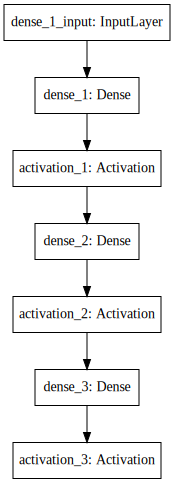

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# 2. More about keras

* activation: https://keras.io/activations/, modify activation function
* compile: https://keras.io/models/sequential/
   * loss: https://keras.io/losses/
* add more layers
* train & valid
* training data modified to MNIST
* model persist: https://keras.io/models/about-keras-models/


## 2.1 validation

In [20]:
data_x = iris.data
data_y = np_utils.to_categorical(iris.target, 3)



train_x = data_x
train_y = data_y

valid_x = data_x[130:]
valid_y = data_y[130:]

In [21]:
model.fit(train_x, train_y, epochs=10,  verbose=1, validation_data=(valid_x, valid_y) )#, validation_split=0.0

Train on 150 samples, validate on 20 samples
Epoch 1/10
150/150 [==============================] - 0s - loss: 0.7555 - acc: 0.6667 - val_loss: 1.2751 - val_acc: 0.0000e+00
Epoch 2/10
150/150 [==============================] - 0s - loss: 0.7235 - acc: 0.6667 - val_loss: 1.0430 - val_acc: 0.0000e+00
Epoch 3/10
150/150 [==============================] - 0s - loss: 0.6879 - acc: 0.6667 - val_loss: 0.8553 - val_acc: 0.0000e+00
Epoch 4/10
150/150 [==============================] - 0s - loss: 0.6848 - acc: 0.6600 - val_loss: 0.7016 - val_acc: 1.0000
Epoch 5/10
150/150 [==============================] - 0s - loss: 0.6755 - acc: 0.6667 - val_loss: 0.6647 - val_acc: 1.0000
Epoch 6/10
150/150 [==============================] - 0s - loss: 0.6648 - acc: 0.6667 - val_loss: 0.7185 - val_acc: 1.0000
Epoch 7/10
150/150 [==============================] - 0s - loss: 0.6518 - acc: 0.6667 - val_loss: 0.7684 - val_acc: 1.0000
Epoch 8/10
150/150 [==============================] - 0s - loss: 0.6444 - acc: 0.6

In [25]:
model.fit(train_x, train_y, epochs=10,  verbose=1, validation_split=0.2 )#

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 0s - loss: 0.3724 - acc: 0.8333 - val_loss: 1.1027 - val_acc: 0.0000e+00
Epoch 2/10
120/120 [==============================] - 0s - loss: 0.3704 - acc: 0.8333 - val_loss: 1.1392 - val_acc: 0.0000e+00
Epoch 3/10
120/120 [==============================] - 0s - loss: 0.3701 - acc: 0.8333 - val_loss: 1.1763 - val_acc: 0.0000e+00
Epoch 4/10
120/120 [==============================] - 0s - loss: 0.3683 - acc: 0.8333 - val_loss: 1.1824 - val_acc: 0.0000e+00
Epoch 5/10
120/120 [==============================] - 0s - loss: 0.3671 - acc: 0.8333 - val_loss: 1.1509 - val_acc: 0.0000e+00
Epoch 6/10
120/120 [==============================] - 0s - loss: 0.3647 - acc: 0.8333 - val_loss: 1.1371 - val_acc: 0.0000e+00
Epoch 7/10
120/120 [==============================] - 0s - loss: 0.3637 - acc: 0.8333 - val_loss: 1.1420 - val_acc: 0.0000e+00
Epoch 8/10
120/120 [==============================] - 0s - loss: 0

## 2.2 MNIST 

In [2]:
from sklearn.datasets import load_digits
from keras.utils import np_utils

digit = load_digits()

data_x = digit.data
data_y = np_utils.to_categorical(digit.target, 10)

train_x = data_x
train_y = data_y

data_x.shape

(1797, 64)

In [3]:
model = Sequential() # 顺序模型

# 输入层
model.add(Dense(400, input_shape=(64,)))  # Dense就是常用的全连接层
model.add(Activation('sigmoid')) # 激活函数

# 隐层
model.add(Dense(160))  # Dense就是常用的全连接层
model.add(Activation('sigmoid')) # 激活函数

# 输出层
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [4]:
model.fit(train_x, train_y, epochs=10,  verbose=1, validation_split=0.2 )#

Train on 1437 samples, validate on 360 samples
Epoch 1/10
1437/1437 [==============================] - 0s - loss: 1.4335 - acc: 0.6910 - val_loss: 0.8681 - val_acc: 0.8278
Epoch 2/10
1437/1437 [==============================] - 0s - loss: 0.4860 - acc: 0.9304 - val_loss: 0.5292 - val_acc: 0.8750
Epoch 3/10
1437/1437 [==============================] - 0s - loss: 0.2547 - acc: 0.9589 - val_loss: 0.4040 - val_acc: 0.8861
Epoch 4/10
1437/1437 [==============================] - 0s - loss: 0.1673 - acc: 0.9798 - val_loss: 0.3525 - val_acc: 0.9028
Epoch 5/10
1437/1437 [==============================] - 0s - loss: 0.1190 - acc: 0.9847 - val_loss: 0.3150 - val_acc: 0.9139
Epoch 6/10
1437/1437 [==============================] - 0s - loss: 0.0880 - acc: 0.9916 - val_loss: 0.3036 - val_acc: 0.9083
Epoch 7/10
1437/1437 [==============================] - 0s - loss: 0.0712 - acc: 0.9930 - val_loss: 0.2956 - val_acc: 0.9111
Epoch 8/10
1437/1437 [==============================] - 0s - loss: 0.0572 - ac


## 2.3 model persist and load

model.save

* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.


In [5]:
model.save('model.h5')

In [8]:
from keras.models import load_model

model2 = load_model('model.h5')

In [7]:
train_x[0].shape

(64,)

In [9]:
y_pred = model2.predict(train_x)

In [10]:
y_pred[1500]

array([ 0.00366759,  0.40605679,  0.03928011,  0.28569439,  0.00639894,
        0.002873  ,  0.00140929,  0.01577912,  0.07232288,  0.16651784], dtype=float32)

In [11]:
train_y[1500]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])